In [1]:
%env KERAS_BACKEND = tensorflow

env: KERAS_BACKEND=tensorflow


In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [3]:
 from keras.datasets import mnist

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
x_train[3]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0, 124, 253, 255,  63,   0,   0,   0,   0,
          0,   0],
       [  

###  輸入格式整理

如果你還記得, 我們每筆輸入資料都是 28x28 的陣列, CNN 其實就是吃「圖」的, 所以基本上不用像之前把每筆資料拉平。但是平常的圖都有 R, G, B 三個 channels, 每個 channel 都是一個矩陣, 也就是一張圖可能是三個矩陣! 我們是灰階, 也就是只有一個 channel。但這件事也要明確的告訴 Keras。

換句話說, 我們的輸入每筆資料型式要從 (28, 28) 換成 (28, 28, 1)!

In [6]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000, 28,28,1)

In [7]:
X = x_train[10][:,:,0]

In [8]:
x_train[3][:,:,0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0, 124, 253, 255,  63,   0,   0,   0,   0,
          0,   0],
       [  

In [9]:
X

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  42, 118,
        219, 166, 118, 118,   6,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 103, 242, 254,
        254, 254, 254, 254,  66,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

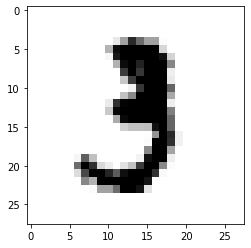

In [10]:
plt.imshow(X, cmap='Greys')

In [11]:
from keras.utils import np_utils

In [12]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

## 打造CNN神經網路
* 做 <span style="color:red;">3</span> 次 convolution, 每次都接 max-pooling
* filter 大小都是 <span style="color:red;">3x3</span>, max-pooling 都用 <span style="color:red;">2x2</span> 為一小區塊



In [13]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten ## 將小矩陣拉成一整根向量
from keras.layers import Conv2D, MaxPooling2D ##因為我們的資料是平面的

In [14]:
from keras.optimizers import SGD

## 架構神經網路

In [15]:
model = Sequential()

In [16]:
model.add(Conv2D(32,(3,3), padding='same', input_shape=(28,28,1))) ##第一層卷積組合
##padding : 輸出大小並不改變（32個 28X28矩陣）將圖的最外圈產生一圈0->30x30
model.add(Activation('relu'))

In [17]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [18]:
model.add(Conv2D(64,(3,3), padding='same')) ## 32->64 filter數量越來越多（越精細）
model.add(Activation('relu'))

In [19]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [20]:
model.add(Conv2D(128,(3,3), padding='same')) 
model.add(Activation('relu'))

In [21]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [22]:
model.add(Flatten())## 送到 Dense層之前要把資料拉成一個向量
model.add(Dense(200))
model.add(Activation('relu'))

In [23]:
model.add(Dense(10)) ## 輸出
model.add(Activation('softmax'))

In [24]:
model.compile(loss='mse',optimizer=SGD(lr=0.05), metrics=['accuracy'])

In [25]:
model.summary() ## Param = 320 : (3x3+1) x 32 1個 bias

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         7

In [26]:
(3*3+1)*32

320

In [27]:
((3*3)*32+1)*64 ##因為前面已經學了32個過濾器

18496

In [28]:
((3*3)*64+1)*128

73856

In [29]:
model.fit(x_train,y_train, batch_size=100,epochs=10)

Epoch 1/10
600/600 [==============================] - 44s 72ms/step - loss: 0.1799 - accuracy: 0.0973
Epoch 2/10
600/600 [==============================] - 57s 95ms/step - loss: 0.1809 - accuracy: 0.0954
Epoch 3/10
600/600 [==============================] - 56s 93ms/step - loss: 0.1807 - accuracy: 0.0966
Epoch 4/10
600/600 [==============================] - 58s 96ms/step - loss: 0.1804 - accuracy: 0.0981
Epoch 5/10
600/600 [==============================] - 55s 92ms/step - loss: 0.1805 - accuracy: 0.0973
Epoch 6/10
600/600 [==============================] - 55s 91ms/step - loss: 0.1805 - accuracy: 0.0974
Epoch 7/10
600/600 [==============================] - 56s 94ms/step - loss: 0.1811 - accuracy: 0.0945
Epoch 8/10
600/600 [==============================] - 78s 130ms/step - loss: 0.1803 - accuracy: 0.0986
Epoch 9/10
600/600 [==============================] - 61s 102ms/step - loss: 0.1807 - accuracy: 0.0965
Epoch 10/10
600/600 [==============================] - 63s 105ms/step - loss: 0.

In [30]:
score = model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.1804 - accuracy: 0.0982


In [31]:
print('loss:',score[0])
print('acc:',score[1])

loss: 0.18036003410816193
acc: 0.0982000008225441


In [32]:
model_json = model.to_json()
open('second_DL_CNN.json','w').write(model_json)
model.save_weights('second_DL_CNN.h5')

In [33]:
predict = model.predict_classes(x_test)

/Users/hao/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


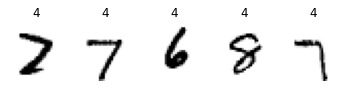

In [34]:
pick = np.random.randint(1,9999,5)
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(x_test[pick[i]].reshape(28,28),cmap='Greys')
    plt.title(predict[pick[i]])
    plt.axis("off")